In [1]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from datetime import datetime as dt

#-----------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#----------------------------------------------------

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#----------------------------------------------------

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# Read the file "data.csv" and print the contents.
#!cat data/data.csv
from google.colab import files
uploaded=files.upload()
data = pd.read_csv("data.csv", index_col=False,)

Saving data.csv to data.csv


<Figure size 360x360 with 0 Axes>

In [2]:
data.shape

(569, 32)

In [3]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Id column is redundant and not useful, we want to drop it
data.drop(['id'], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
#Encoding Male and Female to 1 and 0
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})
data['diagnosis'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [11]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (569, 30)
Y: (569,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.25,
                                                    random_state = 0)

print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(Y_train.shape))
print("Y_test: {}".format(Y_test.shape))

X_train: (426, 30)
X_test: (143, 30)
Y_train: (426,)
Y_test: (143,)


In [14]:
#Building our baseline dummy classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()
clf.fit(X_train, Y_train)

#Predicting Results
y_pred = clf.predict(X_test)

#Calculating Resulta
print("CM: \n",confusion_matrix(Y_test, y_pred))
print("acc: {0}%".format(accuracy_score(Y_test, y_pred) * 100))

CM: 
 [[ 0 53]
 [ 0 90]]
acc: 62.93706293706294%


In [15]:
st=dt.now()
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)


knn_pred = knn.predict(X_test)

#Model Evaluation
kacc = accuracy_score(Y_test, knn_pred)
print('Accuracy Score: ' + str(kacc))

print('Precision Score: ' + str(precision_score(Y_test, knn_pred)))

print('Recall Score: ' + str(recall_score(Y_test, knn_pred)))

print('F1 Score: ' + str(f1_score(Y_test, knn_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, knn_pred)))

Time taken to complete random search:  0:00:00.003029
Accuracy Score: 0.9440559440559441
Precision Score: 0.9555555555555556
Recall Score: 0.9555555555555556
F1 Score: 0.9555555555555556
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



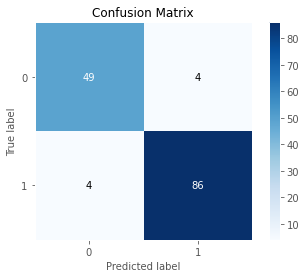

In [16]:
# Making the Confusion Matrix knn
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test, knn_pred)
plt.show()

In [17]:
st=dt.now()
l_svc = SVC(kernel = 'linear')
l_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

l_pred = l_svc.predict(X_test)

#Model Evaluation
lsvcacc = accuracy_score(Y_test, l_pred)
print('Accuracy Score: ' + str(lsvcacc))

print('Precision Score: ' + str(precision_score(Y_test, l_pred)))

print('Recall Score: ' + str(recall_score(Y_test, l_pred)))

print('F1 Score: ' + str(f1_score(Y_test, l_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, l_pred)))

Time taken to complete random search:  0:00:00.576918
Accuracy Score: 0.958041958041958
Precision Score: 0.9883720930232558
Recall Score: 0.9444444444444444
F1 Score: 0.9659090909090908
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        53
           1       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



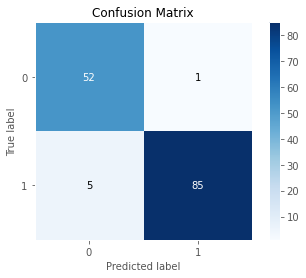

In [18]:
# Making the Confusion Matrix lsvc
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test,  l_pred)
plt.show()


In [19]:
st=dt.now()
decison = DecisionTreeClassifier(criterion = 'entropy', 
                                 random_state = 0)
decison.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

decison_pred = decison.predict(X_test)

#Model Evaluation
dtacc = accuracy_score(Y_test, decison_pred)
print('Accuracy Score: ' + str(dtacc))

print('Precision Score: ' + str(precision_score(Y_test, decison_pred)))

print('Recall Score: ' + str(recall_score(Y_test, decison_pred)))

print('F1 Score: ' + str(f1_score(Y_test, decison_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, decison_pred)))

Time taken to complete random search:  0:00:00.014184
Accuracy Score: 0.958041958041958
Precision Score: 0.9772727272727273
Recall Score: 0.9555555555555556
F1 Score: 0.9662921348314608
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



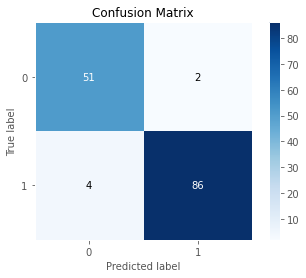

In [20]:
# Making the Confusion Matrix dt
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test, decison_pred)
plt.show()

In [21]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
0,212
1,357


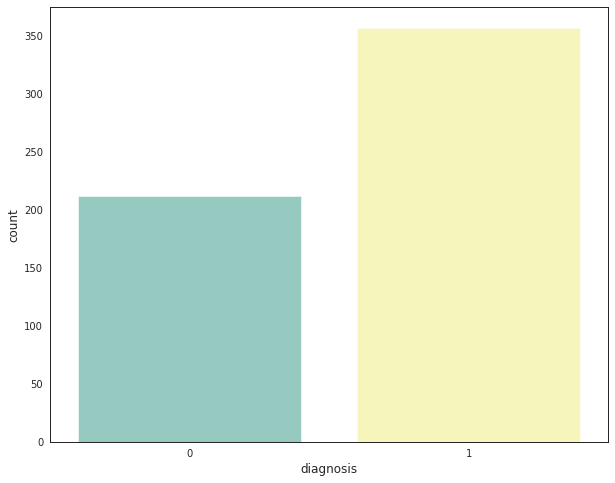

In [22]:
#lets get the frequency of cancer diagnosis
import seaborn as sns
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

In [23]:
#Building Our Model
# Initialising the ANN
classifier = Sequential()

#Input and 1st Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform',
                     input_dim = 30))
classifier.add(Dropout(0.1))


#2nd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(0.2))   


#3rd Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(0.3)) 

#4th Hidden Layer
classifier.add(Dense(units = 20,
                     activation = 'relu',
                     kernel_initializer = 'uniform'))
classifier.add(Dropout(0.4))  


#Output Layer
classifier.add(Dense(units = 1,
                     activation = 'sigmoid',
                     kernel_initializer = 'uniform'))
               
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy']) 
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                4

In [36]:
history = classifier.fit(X_train, 
                         Y_train, 
                         batch_size = 32, 
                         epochs = 230, 
                         validation_split=0.20)

Epoch 1/230
11/11 [==============================] - 0s 9ms/step - loss: 0.1228 - accuracy: 0.9500 - val_loss: 0.1193 - val_accuracy: 0.9419
Epoch 2/230
11/11 [==============================] - 0s 5ms/step - loss: 0.1327 - accuracy: 0.9500 - val_loss: 0.1512 - val_accuracy: 0.9419
Epoch 3/230
11/11 [==============================] - 0s 7ms/step - loss: 0.0940 - accuracy: 0.9588 - val_loss: 0.1923 - val_accuracy: 0.9419
Epoch 4/230
11/11 [==============================] - 0s 7ms/step - loss: 0.1107 - accuracy: 0.9559 - val_loss: 0.1423 - val_accuracy: 0.9535
Epoch 5/230
11/11 [==============================] - 0s 7ms/step - loss: 0.0879 - accuracy: 0.9706 - val_loss: 0.1588 - val_accuracy: 0.9419
Epoch 6/230
11/11 [==============================] - 0s 7ms/step - loss: 0.0915 - accuracy: 0.9588 - val_loss: 0.1434 - val_accuracy: 0.9419
Epoch 7/230
11/11 [==============================] - 0s 5ms/step - loss: 0.0893 - accuracy: 0.9588 - val_loss: 0.1408 - val_accuracy: 0.9535
Epoch 8/230
1

In [37]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
ann_pred = classifier.predict(X_test)
ann_pred = (ann_pred > 0.5)

#Model Evaluation
ann = accuracy_score(Y_test, ann_pred)
print('Accuracy Score: ' + str(ann))

print('Precision Score: ' + str(precision_score(Y_test, ann_pred)))

print('Recall Score: ' + str(recall_score(Y_test, ann_pred)))

print('F1 Score: ' + str(f1_score(Y_test, ann_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, ann_pred)))

Accuracy Score: 0.972027972027972
Precision Score: 0.967391304347826
Recall Score: 0.9888888888888889
F1 Score: 0.978021978021978
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



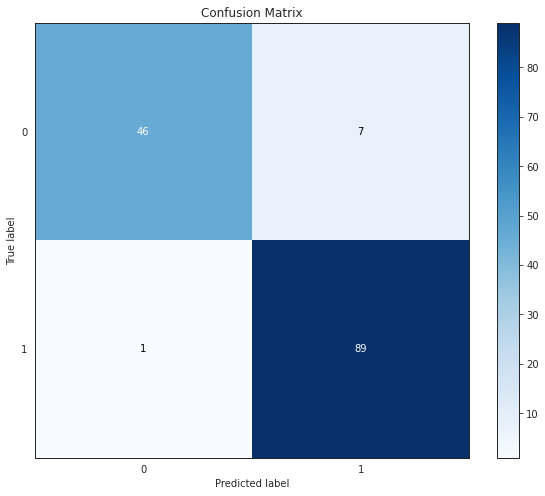

In [26]:
# Making the Confusion Matrix ann
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test, ann_pred)
plt.show()

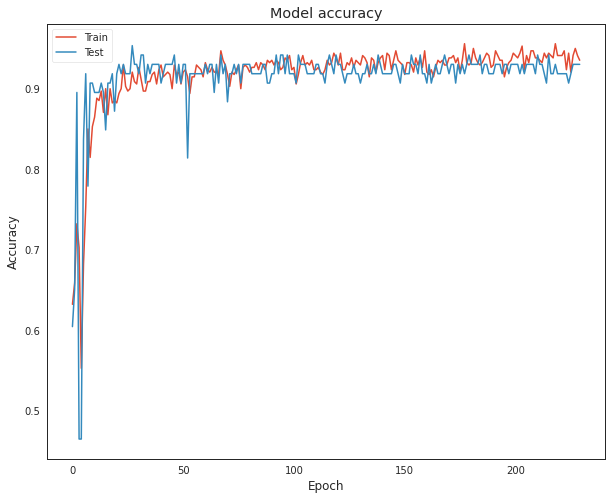

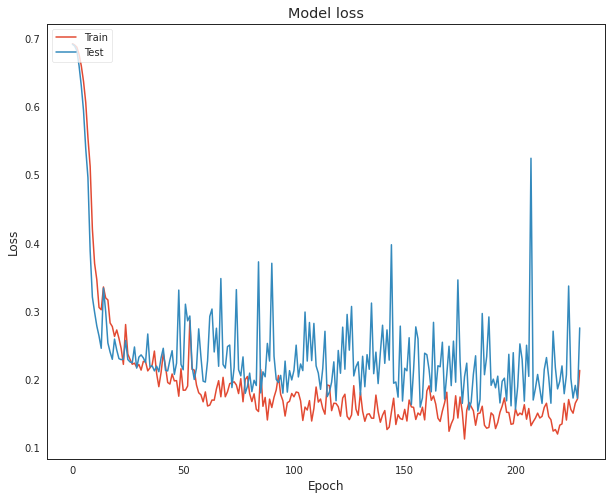

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
print('\n                             Accuracy')
print('                            -------------')


print('KNN Classifier             : {:.04} %'.format(kacc * 100))
print('Linear SVC                 : {:.04} %'.format(lsvcacc * 100))

print('Decision Trees Classifier  : {:.04} %'.format(dtacc * 100))

print('Artificial Neural Network  : {:.04} %'.format(ann * 100))


                             Accuracy
                            -------------
KNN Classifier             : 94.41 %
Linear SVC                 : 95.8 %
Decision Trees Classifier  : 95.8 %
Artificial Neural Network  : 94.41 %


Text(0.5, 1.0, 'Accuracy Comparism')

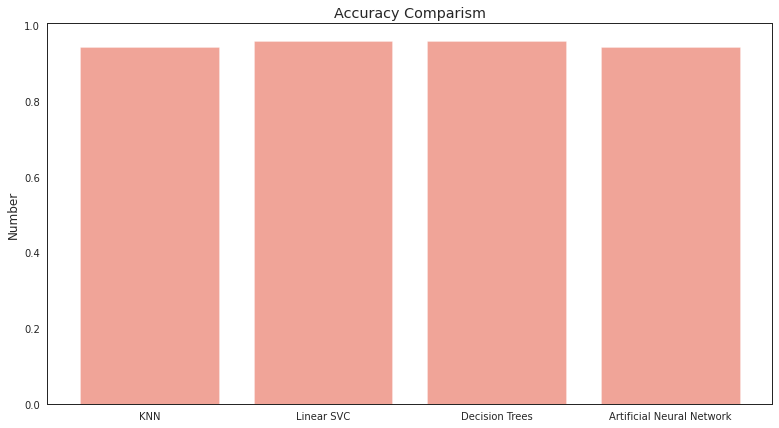

In [29]:
figure = plt.figure(figsize=(13, 7))
# Visualizing the results
objects = [
           'KNN', 
           'Linear SVC', 
         
           'Decision Trees', 
         
       
        
           'Artificial Neural Network']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[kacc,lsvcacc,dtacc, ann],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Accuracy Comparism')